Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the UN’s Population Growth, Fertility and Mortality Indicators
data = pd.read_csv('./SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv',encoding='ISO-8859-1')
data

,T03,Population growth and indicators of fertility and mortality,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
...,...,...,...,...,...,...,...
4895,716,Zimbabwe,2020,Total fertility rate (children per women),3.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4896,716,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",38.7,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4897,716,Zimbabwe,2020,Life expectancy at birth for both sexes (years),60.8,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4898,716,Zimbabwe,2020,Life expectancy at birth for males (years),59.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


Question 2

In [3]:
data_copy = data.copy();
data_copy.columns = data_copy.iloc[0]
data_copy = data_copy.drop(labels=0,axis=0)

In [4]:
#Selecting the life expectancy data for both sexes series for countries in the year 2010
data_required = data_copy.iloc[624:]

In [5]:
data_life_exp = data_required.loc[data_required['Series'] == 'Life expectancy at birth for both sexes (years)']
data_life_exp_year = data_life_exp.loc[data_life_exp['Year'] == '2010']
data_life_exp_values =data_life_exp_year['Value'].to_numpy().astype('float')


In [6]:
#Size of the dataset
print(f'Length of data = {data_life_exp_values.shape[0]}')

Length of data = 201


Question 3

In [7]:
#MEAN of the data_life_exp_values
#There has been ups and downs from region and country wise data for the life expectancy of given years in data . But here we can see for the particular year 2010, average life expectancy for both the sexes is 69. This value is mean for the data_life_exp_values which is 69.49. It indicates that the average distribution of life expectancy for both sexes at 2010.
np.mean(data_life_exp_values)

69.49104477611941

In [8]:
#MEDIAN of the data_life_exp_values
#The value of median shows that the middle value, here which is the age which is 72.5 
#We found the value of mean to be 69.49, but there are other ways to find the most optimal number for life expectancy for both sexes in 2010. By using median, which separates higher half from lower half of given data. Here, median for the data_life_exp_values is 72.5, that indicates it is centered value in data and distribution of data is around the value of 72.5, making it central tendency of measure as the histogram suggests the data as skewed.
np.median(data_life_exp_values)

72.5

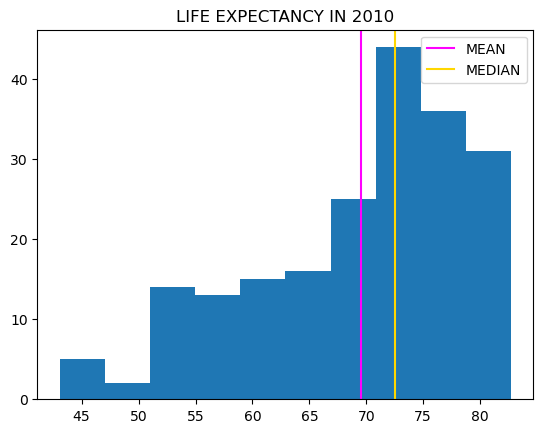

In [9]:
#HISTOGRAM OF THE LIFE EXPECTANCY IN THE YEAR 2010
plt.title('LIFE EXPECTANCY IN 2010')
plt.axvline(x=np.mean(data_life_exp_values), color='magenta', label='MEAN')
plt.axvline(x=np.median(data_life_exp_values), color='gold', label='MEDIAN')
plt.hist(data_life_exp_values)
plt.legend()
plt.show()

Question 4 & 5

In [10]:
#INTER QUARTILE RANGE
print(np.subtract(*np.percentile(data_life_exp_values,[75,25])))

11.599999999999994


In [11]:
#STANDARD DEVIATION OF DATASET
np.std(data_life_exp_values)

9.358286795362906

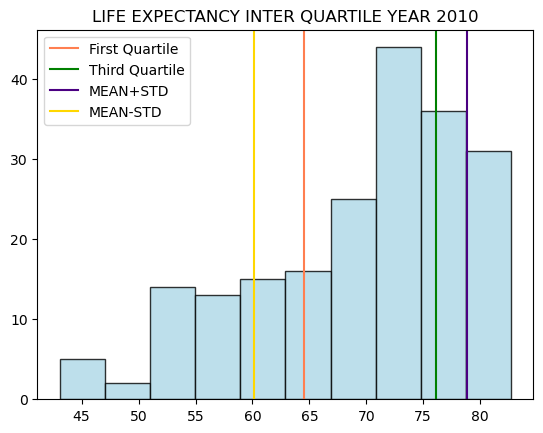

In [12]:
#Histogram plotting the life expectancy rate in the year 2010 with first quartile,third quartile,mean+standard_deviation and mean-standard_deviation
plt.title('LIFE EXPECTANCY INTER QUARTILE YEAR 2010')

plt.axvline(x=np.percentile(data_life_exp_values,25), color='coral', label='First Quartile')
plt.axvline(x=np.percentile(data_life_exp_values,75), color='green', label='Third Quartile')

plt.axvline(x=np.mean(data_life_exp_values) + np.std(data_life_exp_values) , color='indigo', label='MEAN+STD')
plt.axvline(x=np.mean(data_life_exp_values) - np.std(data_life_exp_values), color='gold', label='MEAN-STD')

plt.hist(data_life_exp_values,alpha=0.8,color='lightblue', edgecolor='black')
plt.legend()
plt.show()

In [13]:
#First and Third Quartile

life_exp_first_quartile=np.percentile(data_life_exp_values,25)
print(life_exp_first_quartile)

life_exp_third_quartile=np.percentile(data_life_exp_values,75)
print(life_exp_third_quartile)

64.5
76.1


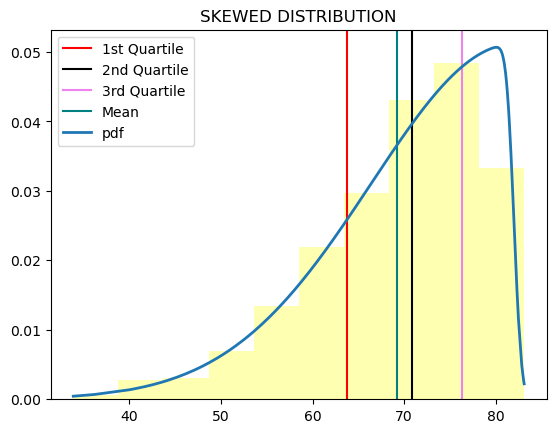

In [14]:
from scipy.stats import skewnorm
from scipy import stats

fig, ax = plt.subplots(1, 1)
x = data_life_exp_values
a,loc,scale = skewnorm.fit(x)
r1 = skewnorm.rvs(a,loc,scale,size=1000)
pdf = skewnorm.pdf(np.sort(r1),a,loc,scale)

plt.axvline(x=np.percentile(r1,25),color='red', label = '1st Quartile')
plt.axvline(x=np.percentile(r1,50),color='black', label = '2nd Quartile')
plt.axvline(x=np.percentile(r1,75),color='violet', label = '3rd Quartile')
plt.axvline(x=r1.mean(),color='teal', label = 'Mean')


plt.title('SKEWED DISTRIBUTION')

ax.plot(np.sort(r1), pdf, lw=2, label='pdf')
ax.hist(r1, density=True, histtype='stepfilled', alpha=0.3, color='yellow')

plt.legend()
plt.show()

In [15]:
#By ploting we get skewed distribution which is left skewed. So, we can call it left skewed or negatively skewed distribution. Here we can see from the above histogram that mean and median value is quite close so choosing any value will not effect much on model but median will be better option according to the theories. We are taking mean as reference and that suggests that life expectancy rate of the majority of the people from the distribution is above mean 69. So, majority of the people will have age group above 69. So, this kind of distribution is suitable for our model life expectancy.
print('Mean of distribution: ', np.mean(r1))
print('Median of distribution: ', np.median(r1))

range = r1.max()-r1.min()

print('Range: ',range)
print('IQR: ',np.subtract(*np.percentile(r1, [75, 25])))
print('Standard Deviation: ',r1.std())

Mean of distribution:  69.21613256243572
Median of distribution:  70.82096946702785
Range:  49.215577380207215
IQR:  12.57152243244743
Standard Deviation:  9.138165113930013
